In [0]:
import os
from typing import List, Dict
import re
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import boto3
from boto3.dynamodb.conditions import Key
import matplotlib.pyplot as plt
from fastprogress import progress_bar as pb

In [0]:
df_stockprice_meta = pd.read_csv('s3://fin-app/stockprice_candlechart/metadata/DAILY_WINDOW-120d_STRIDE-30d_WIDTH-0.5/stockprice_metadata.csv')

In [4]:
df_stockprice_meta

,s3_filepath,code,start_dt,end_dt,change_rate_30d
0,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-01-04,1983-05-04,-0.029299
1,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-02-03,1983-06-03,0.004054
2,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-03-05,1983-07-03,-0.024837
3,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-04-04,1983-08-02,-0.010135
4,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-05-04,1983-09-01,-0.027174
...,...,...,...,...,...
959043,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-03-27,2019-07-25,-0.085521
959044,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-04-26,2019-08-24,0.102655
959045,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-05-26,2019-09-23,-0.041828
959046,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-06-25,2019-10-23,0.053339


In [5]:
df_stockprice_meta.change_rate_30d.isnull().sum()

6325

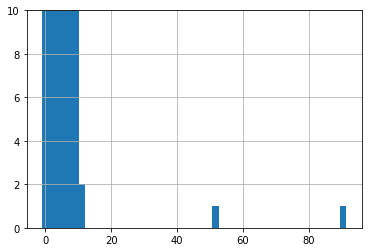

In [6]:
plt.ylim(0, 10)
df_stockprice_meta['change_rate_30d'].hist(bins=50)

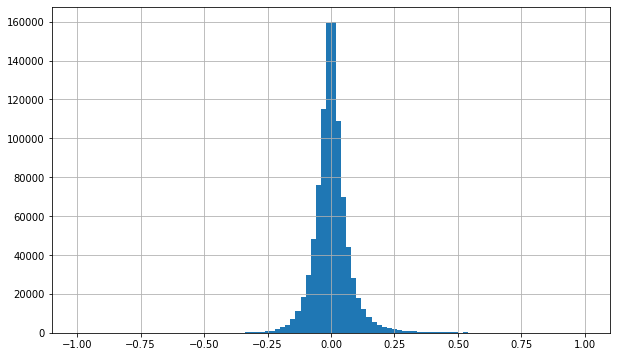

In [7]:
plt.figure(figsize=(10, 6))
df_stockprice_meta[df_stockprice_meta['change_rate_30d'] < 1.0]['change_rate_30d'].hist(bins=100)

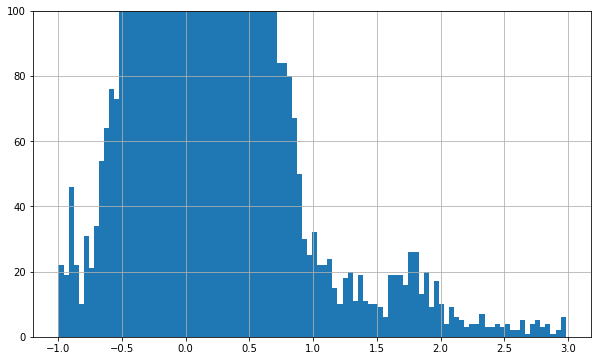

In [8]:
plt.figure(figsize=(10, 6))
plt.ylim(0, 100)
df_stockprice_meta[df_stockprice_meta['change_rate_30d'] < 3.0]['change_rate_30d'].hist(bins=100)

In [9]:
len(df_stockprice_meta[df_stockprice_meta['change_rate_30d'] < 1.0])

951925

In [0]:
df_stockprice_meta_valid = df_stockprice_meta.dropna(subset=['change_rate_30d'])

In [0]:
df_stockprice_meta_valid = df_stockprice_meta[df_stockprice_meta['change_rate_30d'] < 3.0]

In [12]:
df_stockprice_meta_valid[(df_stockprice_meta_valid['change_rate_30d'] < 0.03) & (df_stockprice_meta_valid['change_rate_30d'] > -0.03)]

,s3_filepath,code,start_dt,end_dt,change_rate_30d
0,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-01-04,1983-05-04,-0.029299
1,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-02-03,1983-06-03,0.004054
2,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-03-05,1983-07-03,-0.024837
3,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-04-04,1983-08-02,-0.010135
4,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-05-04,1983-09-01,-0.027174
...,...,...,...,...,...
959032,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-05-01,2018-08-29,-0.007617
959036,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-08-29,2018-12-27,-0.007688
959038,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-10-28,2019-02-25,-0.013791
959040,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-12-27,2019-04-26,-0.023604


In [13]:
df_stockprice_meta_valid[(df_stockprice_meta_valid['change_rate_30d'] >= 0.03)]

,s3_filepath,code,start_dt,end_dt,change_rate_30d
8,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-09-01,1983-12-30,0.034459
13,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-01-29,1984-05-28,0.054121
15,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-03-29,1984-07-27,0.032057
18,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-06-27,1984-10-25,0.108366
19,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-07-27,1984-11-24,0.388950
...,...,...,...,...,...
959023,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2017-08-04,2017-12-02,0.065640
959028,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-01-01,2018-05-01,0.085977
959034,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-06-30,2018-10-28,0.110183
959044,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-04-26,2019-08-24,0.102655


In [14]:
df_stockprice_meta_valid[(df_stockprice_meta_valid['change_rate_30d'] <= -0.03)]

,s3_filepath,code,start_dt,end_dt,change_rate_30d
6,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-07-03,1983-10-31,-0.030833
10,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-10-31,1984-02-28,-0.030789
14,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-02-28,1984-06-27,-0.066038
21,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-09-25,1985-01-23,-0.075235
22,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1984-10-25,1985-02-22,-0.055794
...,...,...,...,...,...
959037,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-09-28,2019-01-26,-0.108651
959039,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-11-27,2019-03-27,-0.033822
959041,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-01-26,2019-05-26,-0.066607
959043,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-03-27,2019-07-25,-0.085521


In [0]:
def label_func(change_rate_30d):
    if change_rate_30d >= 0.03:
        return 2
    elif change_rate_30d > -0.03:
        return 1
    else:
        return 0

In [16]:
df_stockprice_meta_valid['change_rate_30d_label'] = df_stockprice_meta_valid['change_rate_30d'].map(label_func)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_stockprice_meta_valid

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
0,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-01-04,1983-05-04,-0.029299,1
1,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-02-03,1983-06-03,0.004054,1
2,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-03-05,1983-07-03,-0.024837,1
3,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-04-04,1983-08-02,-0.010135,1
4,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1983-05-04,1983-09-01,-0.027174,1
...,...,...,...,...,...,...
959042,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-02-25,2019-06-25,0.010985,1
959043,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-03-27,2019-07-25,-0.085521,0
959044,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-04-26,2019-08-24,0.102655,2
959045,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-05-26,2019-09-23,-0.041828,0


In [0]:
SANPLING_N_PER_CLASS = 20000

In [0]:
df_test_label0 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['start_dt'] > '2015-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 0)
].sample(SANPLING_N_PER_CLASS)

df_test_label1 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['start_dt'] > '2015-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 1)
].sample(SANPLING_N_PER_CLASS)

df_test_label2 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['start_dt'] > '2015-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 2)
].sample(SANPLING_N_PER_CLASS)

df_test = pd.concat([df_test_label0, df_test_label1, df_test_label2])

In [25]:
df_test_label0

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
767383,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8253,2019-03-26,2019-07-24,-0.041496,0
309039,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4707,2016-10-27,2017-02-24,-0.031596,0
41421,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1926,2015-09-13,2016-01-11,-0.053180,0
663118,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7743,2018-02-05,2018-06-05,-0.219071,0
409297,s3://fin-app/stockprice_candlechart/DAILY_WIND...,5949,2016-02-21,2016-06-20,-0.123684,0
...,...,...,...,...,...,...
430203,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6099,2015-04-06,2015-08-04,-0.086530,0
367937,s3://fin-app/stockprice_candlechart/DAILY_WIND...,5380,2016-05-10,2016-09-07,-0.034357,0
213976,s3://fin-app/stockprice_candlechart/DAILY_WIND...,3858,2016-01-31,2016-05-30,-0.045525,0
467852,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6342,2019-01-26,2019-05-26,-0.052531,0


In [26]:
df_test_label1

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
113499,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2705,2018-01-04,2018-05-04,0.006059,1
61742,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2055,2019-05-25,2019-09-22,-0.009436,1
315399,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4760,2019-01-30,2019-05-30,-0.007340,1
845248,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9049,2018-05-31,2018-09-28,0.011271,1
142120,s3://fin-app/stockprice_candlechart/DAILY_WIND...,3030,2019-01-26,2019-05-26,-0.021378,1
...,...,...,...,...,...,...
539558,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6777,2016-03-07,2016-07-05,0.004093,1
516959,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6632,2018-04-12,2018-08-10,-0.020776,1
884812,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9446,2016-08-27,2016-12-25,0.024417,1
111105,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2683,2017-09-23,2018-01-21,-0.012407,1


In [27]:
df_test_label2

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
8519,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1723,2017-02-27,2017-06-27,0.030885,2
323599,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4837,2018-08-31,2018-12-29,0.096761,2
184190,s3://fin-app/stockprice_candlechart/DAILY_WIND...,3501,2019-07-01,2019-10-29,0.032707,2
486275,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6408,2017-08-24,2017-12-22,0.038454,2
97738,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2475,2016-12-31,2017-04-30,0.165293,2
...,...,...,...,...,...,...
516721,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6629,2018-04-19,2018-08-17,0.055556,2
486419,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6409,2017-05-18,2017-09-15,0.112483,2
887044,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9478,2015-07-24,2015-11-21,0.423317,2
762572,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8225,2015-08-24,2015-12-22,0.046595,2


In [28]:
df_test

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
767383,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8253,2019-03-26,2019-07-24,-0.041496,0
309039,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4707,2016-10-27,2017-02-24,-0.031596,0
41421,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1926,2015-09-13,2016-01-11,-0.053180,0
663118,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7743,2018-02-05,2018-06-05,-0.219071,0
409297,s3://fin-app/stockprice_candlechart/DAILY_WIND...,5949,2016-02-21,2016-06-20,-0.123684,0
...,...,...,...,...,...,...
516721,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6629,2018-04-19,2018-08-17,0.055556,2
486419,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6409,2017-05-18,2017-09-15,0.112483,2
887044,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9478,2015-07-24,2015-11-21,0.423317,2
762572,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8225,2015-08-24,2015-12-22,0.046595,2


In [0]:
df_train_label0 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['end_dt'] < '2014-09-01') &
    (df_stockprice_meta_valid['end_dt'] > '2000-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 0)
].sample(SANPLING_N_PER_CLASS)

df_train_label1 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['end_dt'] < '2014-09-01') &
    (df_stockprice_meta_valid['end_dt'] > '2000-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 1)
].sample(SANPLING_N_PER_CLASS)

df_train_label2 = df_stockprice_meta_valid[
    (df_stockprice_meta_valid['end_dt'] < '2014-09-01') &
    (df_stockprice_meta_valid['end_dt'] > '2000-01-01') &
    (df_stockprice_meta_valid['change_rate_30d_label'] == 2)
].sample(SANPLING_N_PER_CLASS)

df_train = pd.concat([df_train_label0, df_train_label1, df_train_label2])

In [30]:
df_train_label0

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
892787,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9532,2001-04-29,2001-08-27,-0.030534,0
259791,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4308,2007-09-20,2008-01-18,-0.040437,0
711467,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8016,2000-12-31,2001-04-30,-0.054928,0
474833,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6366,2000-12-30,2001-04-29,-0.106711,0
618754,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7420,2011-03-29,2011-07-27,-0.095327,0
...,...,...,...,...,...,...
167804,s3://fin-app/stockprice_candlechart/DAILY_WIND...,3302,2002-01-24,2002-05-24,-0.030612,0
644897,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7597,2013-03-17,2013-07-15,-0.038230,0
265414,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4350,2011-06-29,2011-10-27,-0.054123,0
879620,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9405,2013-11-26,2014-03-26,-0.034380,0


In [31]:
df_train_label1

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
252432,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4221,2008-04-22,2008-08-20,0.024544,1
392223,s3://fin-app/stockprice_candlechart/DAILY_WIND...,5753,2010-08-10,2010-12-08,-0.017308,1
84580,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2327,2010-11-28,2011-03-28,-0.028421,1
194572,s3://fin-app/stockprice_candlechart/DAILY_WIND...,3623,2010-10-05,2011-02-02,0.001262,1
440204,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6151,2008-04-04,2008-08-02,0.011523,1
...,...,...,...,...,...,...
528354,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6721,2008-01-11,2008-05-10,-0.018750,1
952738,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9964,2002-06-05,2002-10-03,-0.010000,1
104619,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2594,2004-04-13,2004-08-11,-0.000703,1
645595,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7601,2012-10-08,2013-02-05,-0.015440,1


In [32]:
df_train_label2

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
695203,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7961,2006-06-02,2006-09-30,0.081389,2
686867,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7922,2006-02-28,2006-06-28,0.052818,2
863666,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9301,2003-11-16,2004-03-15,0.039625,2
650563,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7628,2011-02-04,2011-06-04,0.094964,2
19326,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1808,2004-11-09,2005-03-09,0.049087,2
...,...,...,...,...,...,...
311581,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4728,2005-07-03,2005-10-31,0.065180,2
2743,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1381,2005-08-18,2005-12-16,0.042982,2
462360,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6325,2007-12-31,2008-04-29,0.042130,2
91291,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2395,2011-07-30,2011-11-27,0.055645,2


In [33]:
df_train

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label
892787,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9532,2001-04-29,2001-08-27,-0.030534,0
259791,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4308,2007-09-20,2008-01-18,-0.040437,0
711467,s3://fin-app/stockprice_candlechart/DAILY_WIND...,8016,2000-12-31,2001-04-30,-0.054928,0
474833,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6366,2000-12-30,2001-04-29,-0.106711,0
618754,s3://fin-app/stockprice_candlechart/DAILY_WIND...,7420,2011-03-29,2011-07-27,-0.095327,0
...,...,...,...,...,...,...
311581,s3://fin-app/stockprice_candlechart/DAILY_WIND...,4728,2005-07-03,2005-10-31,0.065180,2
2743,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1381,2005-08-18,2005-12-16,0.042982,2
462360,s3://fin-app/stockprice_candlechart/DAILY_WIND...,6325,2007-12-31,2008-04-29,0.042130,2
91291,s3://fin-app/stockprice_candlechart/DAILY_WIND...,2395,2011-07-30,2011-11-27,0.055645,2


In [0]:
_aws_session = boto3.session.Session(
    region_name='ap-northeast-1',
    aws_access_key_id=os.environ["AWS_ACCESS_KEY_ID"],
    aws_secret_access_key=os.environ["AWS_SECRET_ACCESS_KEY"],
)

S3_resource = _aws_session.resource('s3')

S3_BUCKET_NAME = 'fin-app'

class S3:

    @staticmethod
    def save_file(
        local_filepath: str,
        s3_filepath: str,
        bucket_name: str = S3_BUCKET_NAME,
    ) -> None:
        """[summary]
        Args:
            local_filepath (str): [description]
            s3_filepath (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
        """
        bucket = S3_resource.Bucket(bucket_name)

        bucket.upload_file(
            local_filepath,
            s3_filepath
        )

    @staticmethod
    def get_filelist(
        basedir: str,
        bucket_name: str = S3_BUCKET_NAME,
        marker: str = '',
    ) -> List[str]:
        """[summary]
        Args:
            basedir (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
            marker (str, optional): [description]. Defaults to ''.
        Returns:
            List[str]: [description]
        """
        bucket = S3_resource.Bucket(bucket_name)
        objs = bucket.meta.client.list_objects(
            Bucket=bucket.name,
            Prefix=basedir if basedir[-1] == '/' else basedir + '/',
            Marker=marker,
        )

        s3_prefix = f's3://{bucket_name}/'
        s3_filelist = []

        while 'Contents' in objs:
            files = [o.get('Key') for o in objs.get('Contents')]

            s3_paths = [os.path.join(
                s3_prefix,
                file,
            ) for file in files]

            s3_filelist += s3_paths

            if 'IsTruncated' in objs:
                marker = files[-1]
                objs = bucket.meta.client.list_objects(
                    Bucket=bucket.name,
                    Prefix=basedir if basedir[-1] == '/' else basedir + '/',
                    Marker=marker,
                )
            else:
                break

        return s3_filelist

    @staticmethod
    def download_file(
        s3_filepath: str,
        local_filepath: str,
        bucket_name: str = S3_BUCKET_NAME,
    ) -> str:
        """[summary]
        Args:
            s3_filepath (str): [description]
            local_filepath (str): [description]
            bucket_name (str, optional): [description]. Defaults to AWSConfig.S3_BUCKET_NAME.
        Returns:
            str: [description]
        """
        bucket = S3_resource.Bucket(bucket_name)

        s3_prefix = f's3://{bucket_name}/'
        filepath = s3_filepath.replace(s3_prefix, '')
        object = bucket.Object(filepath)
        object.download_file(local_filepath)

        return local_filepath

In [0]:
def download_cnadlechart_img(
    s3_filepath_list,
    codes,
    local_dir,
):
    for s3_filepath, code in zip(pb(s3_filepath_list), codes):
        filename = s3_filepath.split('/')[-1]
        local_path = os.path.join(
            local_dir,
            str(code),
            filename
        )
        if not os.path.exists(os.path.dirname(local_path)):
            os.makedirs(os.path.dirname(local_path))
        S3.download_file(
            s3_filepath,
            local_path
        )

In [0]:
download_cnadlechart_img(
    df_train['s3_filepath'][:3],
    df_train['code'][:3],
    './data'
)

In [0]:
!ls data/5352 -l -h

total 8.0K
-rw-r--r-- 1 root root 5.4K Jan  2 04:36 2009-04-17_2009-08-15.png


In [0]:
from PIL import Image

In [0]:
img = Image.open('./data/5352/2009-04-17_2009-08-15.png')

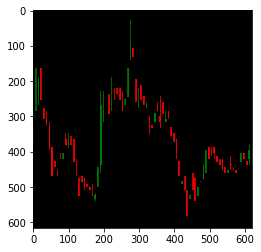

In [0]:
plt.imshow(img)

In [0]:
!rm -rf ./data

In [0]:
download_cnadlechart_img(
    df_train['s3_filepath'],
    df_train['code'],
    './data/train'
)

Buffered data was truncated after reaching the output size limit.

In [0]:
download_cnadlechart_img(
    df_train['s3_filepath'][34462:],
    df_train['code'][34462:],
    './data/train'
)

In [36]:
download_cnadlechart_img(
    df_test['s3_filepath'],
    df_test['code'],
    './data/test'
)

In [0]:
!zip -r train_candlechart_data ./data/train > /dev/null

In [0]:
!zip -r test_candlechart_data ./data/test > /dev/null

In [40]:
ls -l -h

total 404M
drwxr-xr-x 4 root root 4.0K Jan  2 07:28 data/
drwx------ 4 root root 4.0K Jan  2 07:24 drive/
drwxr-xr-x 1 root root 4.0K Dec 18 16:52 sample_data/
-rw-r--r-- 1 root root 216M Jan  2 09:52 test_candlechart_data.zip
-rw-r--r-- 1 root root 188M Jan  2 07:22 train_candlechart_data.zip


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
mkdir /content/drive/'My Drive'/candlechart

mkdir: cannot create directory ‘/content/drive/My Drive/candlechart’: File exists


In [23]:
!cp train_candlechart_data.zip /content/drive/'My Drive'/candlechart

cp: cannot stat 'train_candlechart_data.zip': No such file or directory


In [24]:
!cp test_candlechart_data.zip /content/drive/'My Drive'/candlechart

cp: cannot stat 'test_candlechart_data.zip': No such file or directory


In [25]:
ls drive/'My Drive'/candlechart

test_candlechart_data.zip  train_candlechart_data.zip


In [0]:
!cp drive/'My Drive'/candlechart/train_candlechart_data.zip .

In [0]:
!cp drive/'My Drive'/candlechart/test_candlechart_data.zip .

In [28]:
ls

drive/  sample_data/  test_candlechart_data.zip  train_candlechart_data.zip


In [0]:
!unzip train_candlechart_data.zip -d train_candlechart_data > /dev/null

In [0]:
!unzip test_candlechart_data.zip -d test_candlechart_data > /dev/null

In [0]:
import glob

In [0]:
train_candle_files = glob.glob('train_candlechart_data/**/*.png', recursive=True)
test_candle_files = glob.glob('test_candlechart_data/**/*.png', recursive=True)

In [33]:
len(train_candle_files)

60000

In [0]:
df_local_trainfiles = pd.DataFrame({
    'localpath': train_candle_files
})
df_local_testfiles = pd.DataFrame({
    'localpath': test_candle_files
})

In [0]:
def localpath2S3path(localpath):
    s3_path = os.path.join(
        's3://fin-app/stockprice_candlechart/DAILY_WINDOW-120d_STRIDE-30d_WIDTH-0.5',
        '/'.join(localpath.split('/')[-2:])
    )
    return s3_path

In [36]:
localpath2S3path(df_local_trainfiles.localpath[0])

's3://fin-app/stockprice_candlechart/DAILY_WINDOW-120d_STRIDE-30d_WIDTH-0.5/6293/2001-11-07_2002-03-07.png'

In [0]:
df_local_trainfiles['s3_filepath'] = df_local_trainfiles['localpath'].map(localpath2S3path)
df_local_testfiles['s3_filepath'] = df_local_testfiles['localpath'].map(localpath2S3path)

In [38]:
df_local_trainfiles

,localpath,s3_filepath
0,train_candlechart_data/data/train/6293/2001-11...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
1,train_candlechart_data/data/train/6293/2011-03...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
2,train_candlechart_data/data/train/6293/2014-03...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
3,train_candlechart_data/data/train/6293/2005-06...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
4,train_candlechart_data/data/train/6293/2002-10...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
...,...,...
59995,train_candlechart_data/data/train/6502/2004-06...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
59996,train_candlechart_data/data/train/6502/2008-11...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
59997,train_candlechart_data/data/train/6502/1999-10...,s3://fin-app/stockprice_candlechart/DAILY_WIND...
59998,train_candlechart_data/data/train/6502/2002-02...,s3://fin-app/stockprice_candlechart/DAILY_WIND...


In [0]:
df_meta_localtrain_merged = pd.merge(
    df_stockprice_meta_valid,
    df_local_trainfiles,
    how='left',
    on='s3_filepath'
)
df_meta_localtest_merged = pd.merge(
    df_stockprice_meta_valid,
    df_local_testfiles,
    how='left',
    on='s3_filepath'
)

In [0]:
df_meta_localtrain_merged = df_meta_localtrain_merged[~df_meta_localtrain_merged['localpath'].isnull()]

In [0]:
df_meta_localtest_merged = df_meta_localtest_merged[~df_meta_localtest_merged['localpath'].isnull()]

In [42]:
df_meta_localtrain_merged

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label,localpath
205,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,1999-11-06,2000-03-05,0.097794,2,train_candlechart_data/data/train/1301/1999-11...
253,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2003-10-16,2004-02-13,0.024993,1,train_candlechart_data/data/train/1301/2003-10...
254,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2003-11-15,2004-03-14,0.042076,2,train_candlechart_data/data/train/1301/2003-11...
264,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2004-09-10,2005-01-08,0.017402,1,train_candlechart_data/data/train/1301/2004-09...
269,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2005-02-07,2005-06-07,0.042626,2,train_candlechart_data/data/train/1301/2005-02...
...,...,...,...,...,...,...,...
952362,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2013-01-27,2013-05-27,-0.057055,0,train_candlechart_data/data/train/9997/2013-01...
952363,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2013-02-26,2013-06-26,0.147416,2,train_candlechart_data/data/train/9997/2013-02...
952368,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2013-07-26,2013-11-23,0.011168,1,train_candlechart_data/data/train/9997/2013-07...
952371,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2013-10-24,2014-02-21,-0.045464,0,train_candlechart_data/data/train/9997/2013-10...


In [43]:
df_meta_localtest_merged

,s3_filepath,code,start_dt,end_dt,change_rate_30d,change_rate_30d_label,localpath
397,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2015-08-14,2015-12-12,0.017222,1,test_candlechart_data/data/test/1301/2015-08-1...
403,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2016-02-10,2016-06-09,-0.025053,1,test_candlechart_data/data/test/1301/2016-02-1...
405,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2016-04-10,2016-08-08,-0.009228,1,test_candlechart_data/data/test/1301/2016-04-1...
410,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2016-10-07,2017-02-04,0.056863,2,test_candlechart_data/data/test/1301/2016-10-0...
412,s3://fin-app/stockprice_candlechart/DAILY_WIND...,1301,2016-12-06,2017-04-05,-0.030983,0,test_candlechart_data/data/test/1301/2016-12-0...
...,...,...,...,...,...,...,...
952424,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-03-02,2018-06-30,-0.038654,0,test_candlechart_data/data/test/9997/2018-03-0...
952425,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2018-04-01,2018-07-30,-0.092556,0,test_candlechart_data/data/test/9997/2018-04-0...
952435,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-01-26,2019-05-26,-0.066607,0,test_candlechart_data/data/test/9997/2019-01-2...
952437,s3://fin-app/stockprice_candlechart/DAILY_WIND...,9997,2019-03-27,2019-07-25,-0.085521,0,test_candlechart_data/data/test/9997/2019-03-2...


In [44]:
df_meta_localtrain_merged.groupby('change_rate_30d_label').count()

,s3_filepath,code,start_dt,end_dt,change_rate_30d,localpath
change_rate_30d_label,,,,,,
0,20000,20000,20000,20000,20000,20000
1,20000,20000,20000,20000,20000,20000
2,20000,20000,20000,20000,20000,20000


In [45]:
df_meta_localtest_merged.groupby('change_rate_30d_label').count()

,s3_filepath,code,start_dt,end_dt,change_rate_30d,localpath
change_rate_30d_label,,,,,,
0,20000,20000,20000,20000,20000,20000
1,20000,20000,20000,20000,20000,20000
2,20000,20000,20000,20000,20000,20000


In [0]:
import torch
import torch.nn as nn
import torch.utils.data as data
from torchvision import models, transforms

In [0]:
class CandleDataset(data.Dataset):

    def __init__(self, files, labels, transform):
        self._files = files
        self._labels = labels
        self._transform = transform

    def __len__(self):
        return len(self._files)

    def __getitem__(self, index):

        img = Image.open(self._files[index]).convert("RGB")

        img_transformed = self._transform(img)

        return img_transformed, self._labels[index]

In [0]:
train_transform = test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [0]:
train_candle_dataset = CandleDataset(
    list(df_meta_localtrain_merged['localpath']),
    list(df_meta_localtrain_merged['change_rate_30d_label']),
    train_transform
)
test_candle_dataset = CandleDataset(
    list(df_meta_localtest_merged['localpath']),
    list(df_meta_localtest_merged['change_rate_30d_label']),
    test_transform
)

In [0]:
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_candle_dataset,
    batch_size,
    shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_candle_dataset,
    batch_size,
    shuffle=False
)

In [0]:
batch = next(iter(train_dataloader))

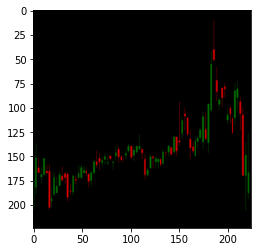

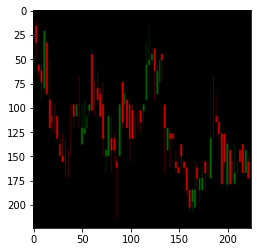

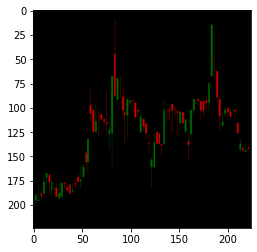

In [123]:
for i in range(3):
    plt.imshow(batch[0][i].permute(1, 2, 0))
    plt.show()

In [0]:
vgg_net = models.vgg16(pretrained=True)

In [72]:
vgg_net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
vgg_net.classifier[6] = nn.Linear(in_features=4096, out_features=3)

In [74]:
for name, param in vgg_net.named_parameters():
    print(f'{name} : {param.requires_grad}')

features.0.weight : True
features.0.bias : True
features.2.weight : True
features.2.bias : True
features.5.weight : True
features.5.bias : True
features.7.weight : True
features.7.bias : True
features.10.weight : True
features.10.bias : True
features.12.weight : True
features.12.bias : True
features.14.weight : True
features.14.bias : True
features.17.weight : True
features.17.bias : True
features.19.weight : True
features.19.bias : True
features.21.weight : True
features.21.bias : True
features.24.weight : True
features.24.bias : True
features.26.weight : True
features.26.bias : True
features.28.weight : True
features.28.bias : True
classifier.0.weight : True
classifier.0.bias : True
classifier.3.weight : True
classifier.3.bias : True
classifier.6.weight : True
classifier.6.bias : True


In [0]:
for name, param in vgg_net.named_parameters():
    if 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [76]:
for name, param in vgg_net.named_parameters():
    print(f'{name} : {param.requires_grad}')

features.0.weight : False
features.0.bias : False
features.2.weight : False
features.2.bias : False
features.5.weight : False
features.5.bias : False
features.7.weight : False
features.7.bias : False
features.10.weight : False
features.10.bias : False
features.12.weight : False
features.12.bias : False
features.14.weight : False
features.14.bias : False
features.17.weight : False
features.17.bias : False
features.19.weight : False
features.19.bias : False
features.21.weight : False
features.21.bias : False
features.24.weight : False
features.24.bias : False
features.26.weight : False
features.26.bias : False
features.28.weight : False
features.28.bias : False
classifier.0.weight : True
classifier.0.bias : True
classifier.3.weight : True
classifier.3.bias : True
classifier.6.weight : True
classifier.6.bias : True


In [77]:
[name for name, param in vgg_net.named_parameters() if param.requires_grad]

['classifier.0.weight',
 'classifier.0.bias',
 'classifier.3.weight',
 'classifier.3.bias',
 'classifier.6.weight',
 'classifier.6.bias']

In [0]:
n_epochs = 10

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    [param for name, param in vgg_net.named_parameters() if param.requires_grad],
    lr=0.01
)

In [79]:
vgg_net.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [80]:
vgg_net.train()

for n in pb(range(n_epochs)):
    print(f'epoch : {n}')
    epoch_loss = 0.0
    correct_n = 0

    for images, labels in pb(train_dataloader):

        optimizer.zero_grad()

        pred_scores = vgg_net(images.to('cuda'))
        loss = criterion(pred_scores, labels.to('cuda'))

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * images.size(0)
        correct_n += torch.sum(torch.argmax(pred_scores, axis=1) == labels.data.to('cuda'))

    epoch_loss /= len(train_dataloader.dataset)
    acc = correct_n.double() / len(train_dataloader.dataset)

    print(f'loss : {epoch_loss}')
    print(f'acc : {acc}')

epoch : 0


loss : 3.2680313289642333
acc : 0.33025000000000004
epoch : 1


loss : 1.3474337646484376
acc : 0.33458333333333334
epoch : 2


loss : 1.2936675834655762
acc : 0.3323666666666667
epoch : 3


loss : 1.1406488881429035
acc : 0.3355166666666667
epoch : 4


loss : 1.1480970520655314
acc : 0.33155
epoch : 5


loss : 1.1724056058247885
acc : 0.3348166666666667
epoch : 6


loss : 1.1227486386617025
acc : 0.3292833333333334
epoch : 7


loss : 1.1031041263580321
acc : 0.33468333333333333
epoch : 8


loss : 1.1312879859288534
acc : 0.3342
epoch : 9


loss : 1.10116759668986
acc : 0.33326666666666666
